## S11 T01
### Agrupa els diferents vols
#### Eloi Canals

Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.

- Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means.

In [1]:
# Carreguem llibreries i el dataset DelayedFlights.csv

import pandas as pd
import matplotlib.pyplot as plt #, mpld3
import numpy as np
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('DelayedFlights.csv', index_col=0)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Eliminar files innecesaries
df = df[df.Diverted==0].copy()
df.drop(labels=["Diverted"], axis=1, inplace=True)

In [4]:
df = df[df.Cancelled==0].copy()
df.drop(labels=["Cancelled", "CancellationCode"], axis=1, inplace=True)

In [5]:
df = df[df['ArrDelay'].notna()].copy()

In [6]:
# Eliminar columnes innecesaries
df.drop(labels=["Year"], axis=1, inplace=True)

In [7]:
# Tractament dels NaNs
display(df.isna().sum().to_frame().T)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,680883,680883,680883,680883,680883


In [8]:
df.fillna(0, inplace=True)

In [9]:
# Tractament dels NaNs
display(df.isna().sum().to_frame().T)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Tractament columnes categoriques
labels = ['FlightNum','UniqueCarrier', 'TailNum', 'Origin', 'Dest']
for category in labels:     
    cat_map = df.groupby(category).size() / len(df)*100
    df[category] = df[category].map(cat_map)

In [11]:
# Fem un sample per no saturar el procesador
#np.random.seed(1234)
df= df.sample(n = 10000)

- Exercici 2
Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [12]:
# Reducció de les dimensions
from sklearn.decomposition import PCA

pca_3 = PCA(n_components= 3)
pc_3 = pca_3.fit_transform(df.values)
print(pca_3.explained_variance_ratio_.round(3))

[0.511 0.278 0.14 ]


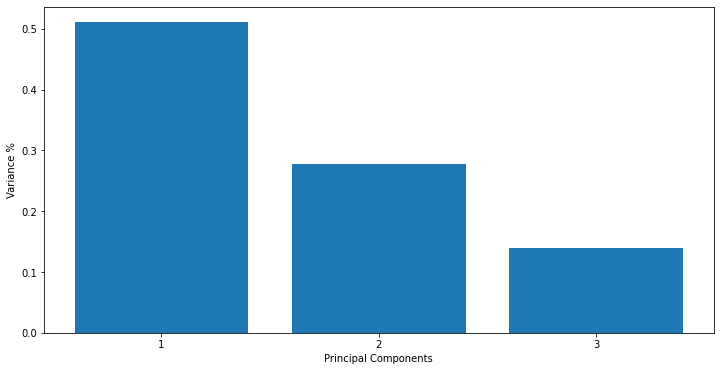

In [13]:
PC = range(1, pca_3.n_components_+1)
plt.figure(figsize=(12,6))
plt.bar(PC, pca_3.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);
plt.show()

In [14]:
pca_3.explained_variance_ratio_.sum()

0.9289494963913933

In [15]:
# Els 3 components contenen el 93% de la variança

In [16]:
df_pcs = pd.DataFrame(data= pc_3, columns = ['PC1', 'PC2', 'PC3'])
df_pcs.head()

,PC1,PC2,PC3
0,499.273841,1538.569565,-566.932102
1,1452.129508,-651.427473,-106.984331
2,-562.857094,-380.531065,100.635139
3,-984.050618,-141.543309,-95.980387
4,-1080.151644,390.695798,-158.521308


In [17]:
df_pcs

,PC1,PC2,PC3
0,499.273841,1538.569565,-566.932102
1,1452.129508,-651.427473,-106.984331
2,-562.857094,-380.531065,100.635139
3,-984.050618,-141.543309,-95.980387
4,-1080.151644,390.695798,-158.521308
...,...,...,...
9995,926.683014,-441.316327,-22.844620
9996,-175.018919,673.774623,1818.884771
9997,-1390.197582,-275.164406,31.572007
9998,-185.175836,-166.332974,-160.325209


In [18]:
# K-Means
from sklearn.cluster import KMeans

Using distortion metric, the best number of clusters for a Kmeans Model is 5


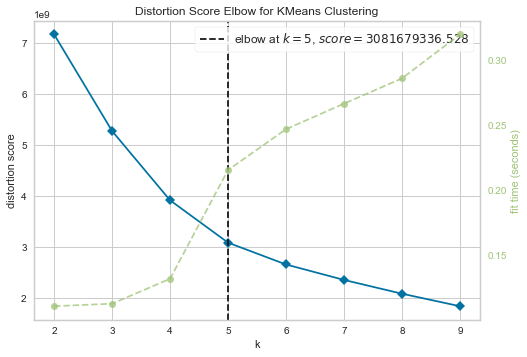

In [19]:
# Mirem el nª de clusters optim
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

for i, metric in enumerate(['distortion']):
    visualizer = KElbowVisualizer(KMeans(), k=(2,10), metric=metric)
    visualizer.fit(df_pcs[['PC1', 'PC2', 'PC3']].values)
    print(r'Using {} metric, the best number of clusters for a Kmeans Model is {}'.format(metric, visualizer.elbow_value_))
    visualizer.show()

In [20]:
n5_k_means = KMeans(init = "k-means++", 
                 n_clusters = 5, 
                 n_init = 12, 
                 random_state= 130).fit(df_pcs[["PC1", "PC2", "PC3"]])

In [21]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

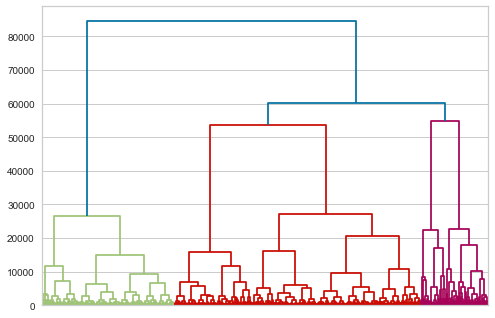

In [22]:
dendrogram = sch.dendrogram(sch.linkage(df_pcs, method='ward'), no_labels=True)

In [23]:
df = pd.concat([df_pcs, pd.DataFrame({'labels':n5_k_means.labels_})], axis=1)

In [24]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df_pcs)
labels = model.labels_

In [25]:
labels

array([2, 4, 1, ..., 1, 0, 1])

In [26]:
# Visualitzem amb un scaterplot
centers_x = n5_k_means.cluster_centers_[:,0]
centers_y = n5_k_means.cluster_centers_[:,1]

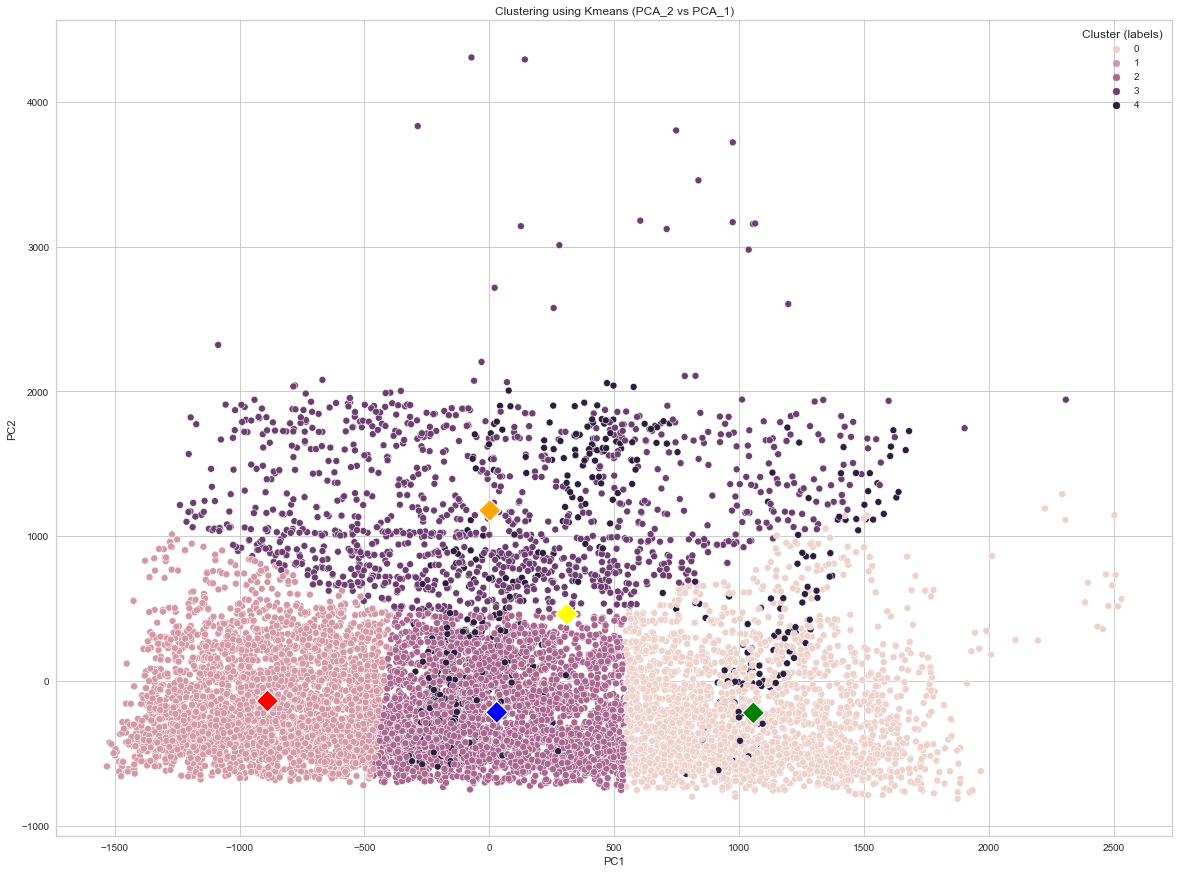

In [27]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_pcs, x='PC1', y='PC2', hue=df.labels)
sns.scatterplot(x=centers_x, y=centers_y, marker = "D", s=250,linewidths = 5, zorder = 10, c=['green', 'red','blue', 'orange','yellow'])
plt.title('Clustering using Kmeans (PCA_2 vs PCA_1)')
plt.legend(title='Cluster (labels)')

- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [28]:
## Metrics
from sklearn.metrics import silhouette_score

In [29]:
n5_k_means_silhouette = silhouette_score(df_pcs[["PC1", "PC2", "PC3"]],n5_k_means.labels_).round(3)
n5_k_means_silhouette

0.378

In [30]:
# Veiem que es molt mes acurat el model KMeans

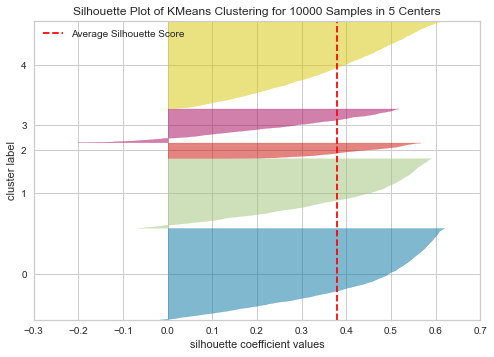

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=42))

In [31]:
# Visualitzacio del parametre silhouette

from yellowbrick.cluster import silhouette_visualizer

# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(5, random_state=42), df_pcs, colors='yellowbrick')